<a href="https://colab.research.google.com/github/sebas7532silva/AppliedAI/blob/main/Actividad2analisisPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Freddy Sebastián Silva Culcay
*   MATRÍCULA: A00828792


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [1]:
import pandas as pd
import numpy as np

#Cambiar el path a conveniencia
path = '/content/drive/MyDrive/MNAV - Inteligencia Artificial Aplicada/'

# Carga de datos
air_df = pd.read_csv(path + 'LaqnData.csv')

In [2]:
# Visualización del header del DataFrame

air_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [3]:
# Visualización del tail del DataFrame

air_df.tail()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


In [4]:
# Métodos estudiados

print(air_df.shape)
print(air_df.columns)
print(air_df.dtypes)

(43800, 6)
Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')
Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object


In [5]:
# Para calcular la proporción de valores nulos por columna, usamos isnull().sum()

columnas_df = air_df.columns
valores_nulos = air_df.isnull().sum()

for col in columnas_df:
  print(col, ":", np.round((valores_nulos[col] / air_df[col].shape[0]) * 100,2))


Site : 0.0
Species : 0.0
ReadingDateTime : 0.0
Value : 7.37
Units : 0.0
Provisional or Ratified : 0.0


2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron? **8760**
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron? **5**
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe. **Site y Provisional or Ratified**
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [6]:
# Mediciones hechas

air_df.nunique()

,0
Site,1
Species,5
ReadingDateTime,8760
Value,1847
Units,3
Provisional or Ratified,1


In [7]:
# Analizamos la columna de Units.

air_df.Units.unique()

array(['ug m-3', 'ug m-3 as NO2', 'ug/m3'], dtype=object)

In [8]:
# Eliminamos algunas columnas del DataFrame

air_df = air_df.drop(columns=['Site','Provisional or Ratified'])
air_df = air_df.drop(columns=['Units'])
air_df.head()

,Species,ReadingDateTime,Value
0,NO,01/01/2017 00:00,3.5
1,NO,01/01/2017 01:00,3.6
2,NO,01/01/2017 02:00,2.2
3,NO,01/01/2017 03:00,2.1
4,NO,01/01/2017 04:00,3.3


3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [9]:
# Conteo por categoria

air_df.Species.value_counts()

,count
Species,
NO,8760
NO2,8760
NOX,8760
PM10,8760
PM2.5,8760


In [10]:
# Total de mediciones

air_df.ReadingDateTime.nunique()

8760

Si coincide con el total de mediciones.

4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [11]:
air_df.groupby('Species').mean(numeric_only=True)

,Value
Species,
NO,15.045115
NO2,38.010185
NOX,61.078661
PM10,22.551704
PM2.5,14.999831


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [12]:
pvt_df = pd.pivot(air_df, index='ReadingDateTime', columns='Species', values='Value')

6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece? **24/01/2017 19:00**
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece? **12/09/2017 23:00**
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta? **Es de 7.1. Significa que el 50% de los datos está por debajo o son iguales a 7.1 NO.**
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa? **Es de 7. Significa que el 25% de los datos está por debajo o son iguales a 7 PM2.5.**

In [13]:
pvt_df.describe()

Species,NO,NO2,NOX,PM10,PM2.5
count,8660.000000,8660.000000,8660.000000,8657.000000,5933.000000
mean,15.045115,38.010185,61.078661,22.551704,14.999831
std,26.678565,18.580841,54.584805,15.344755,13.558588
min,-2.000000,2.800000,1.000000,-5.600000,-8.000000
25%,3.100000,23.800000,30.300000,13.900000,7.000000
50%,7.100000,35.300000,46.900000,19.500000,11.000000
75%,15.500000,49.900000,73.800000,27.300000,18.000000
max,401.799990,120.200000,734.299990,633.099980,128.000000


In [14]:
# Día con el mayor NO2
pvt_df.loc[pvt_df['NO2'] == pvt_df['NO2'].max()].index

Index(['24/01/2017 19:00'], dtype='object', name='ReadingDateTime')

In [15]:
# Día con el mejor valor de PM10
pvt_df.loc[pvt_df['PM10'] == pvt_df['PM10'].min()].index

Index(['12/09/2017 23:00'], dtype='object', name='ReadingDateTime')

7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

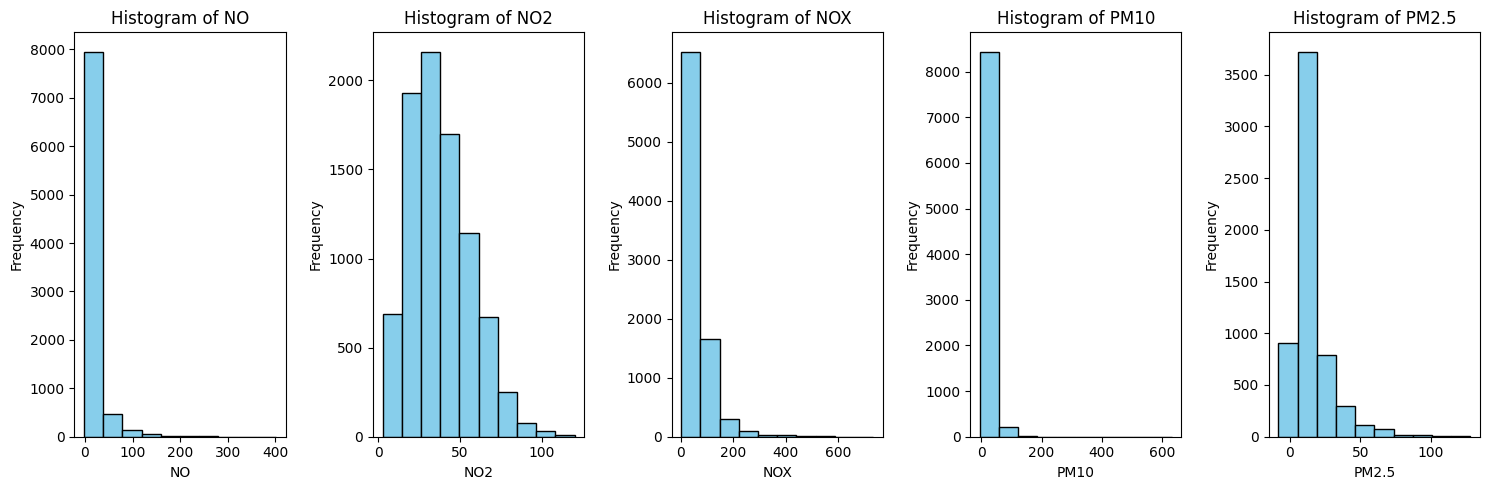

In [16]:
# Histograma por columna de pvt_df

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=pvt_df.columns.shape[0], figsize=(15, 5))

for i, column in enumerate(pvt_df.columns):
    #Histograma para cada columna
    axes[i].hist(pvt_df[column], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Usamos la función tight_layout para ajustar los subplots
plt.tight_layout()

# Mostramos el gráfico
plt.show()

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [17]:
# Crea un DataFrame que contiene 2 columnas con la fecha en la primera columna y la hora en la segunda
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
# Cambia el nombre de las columnas de este DataFrame con "Date" y "Time" respectivamente
datetime_df.columns = ['Date','Time']
# Muestra el DataFrame
datetime_df
# Crea un DataFrame de Fechas con la columna Date del datetime_df partiendo el día, mes y año por "/"
date_df = datetime_df.Date.str.split('/',expand=True)
# Cambia las columnas de este date_df con Day, Month, Year
date_df.columns = ['Day','Month','Year']
# Muestra el DataFrame
date_df
# Hace un join de de los DataFrames creados con air_df y elimina las columnas de ReadingDateTime y Year
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
# Pone un nuevo índice para el DataFrame (Month, Day, Time, Species)
air_df = air_df.set_index(['Month','Day','Time','Species'])
# Muestra el DataFrame
air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

In [18]:
air_df.isna().sum()

,0
Value,3230


9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [19]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

No son iguales. El de la línea 8 toma los contaminantes como un índice, mientras que el de la línea 9 los toma como columnas. Esto deriva en que las dimensiones del resultado cambien, de hecho, la de la línea 8 solo tiene 1 columna y 43800 filas, pero la de la línea 9 cuenta con 8760 filas y 5 columnas. Hacer unstack haría que los valores del índice en Species se vuelvan columnas para tener la información más organizada, en lugar de contar con 3 índices para acceder a un valor.

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

Ambos pares son funciones de Pandas que transforman el formato de un DataFrame con propósitos similares pero ligeramente diferentes.

**Similitudes**:



1.   Permiten convertir datos de un formato ancho (más columnas) a un formato largo (más filas y menos columnas) y viceversa.
2.   Sirven para hacer análisis de series de tiempo o visualizar tablas dinámicas.

**Diferencias**:



1.   melt()/pivot() trabajan principalmente con columnas y su estructura plana. stack()/unstack() lo hacen con múltiples niveles (muchos índices) y eso lo hace más potente para estrcuturas más detalladas o complejas.
2.   melt() convierte un DataFrame de ancho a largo y pivot() lo cambia a un formato ancho (más columnas). stack() transforma las columnas en un nuevo nivel de índice y unstack() convierte un nivel de índice a columnas
3. melt()/pivot() reorganizan columnas para formatos anchos o largos. stack()/unstack() reorganiza columnas o multi niveles de indice, es decir, es más complejo.
4. melt()/pivot() es sencillo con datos de estructura plana. stack()/unstack() es más complejo para datos jerarquicos (secuenciales, etc...).

**Contraparte de melt()**:

Escogería stack() porque tiene un propósito similar de convertir columnas en un nuevo nivel de índice para las filas, pasando de un formato de ancho a largo como melt().



